# Проект: DonorSearch

## 1. Описание

**Задача:** анализ данных НКО DonorSearch.org — организации, мотивирующей людей становиться донорами с целью увеличения количества доноров и повышения уровня активности существующих доноров. Для анализа предоставлены данные о донациях и их планировании и данные о пользователях платформы. В рамках анализа необходимо разработать и рассчитать бизнес-метрики, а также проанализировать поведение пользователей. 

## 2. Знакомство с данными и предобработка

In [1]:
#загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date 
import seaborn as sns

**2.1 Донации**

In [2]:
#загрузим данные
donations = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Мастерская/DonorSearch/ноябрь 2023/ноябрь 2023/Донации/donations_anon 23_11.csv')
donations.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Регион,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации
0,257350,61553,Плазма,23.11.2023,Не указана,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,23.11.2023,На модерации
1,257349,209605,Плазма,20.11.2023,Не указана,Безвозмездно,Нижний Новгород,Нижегородская область,Россия,Передвижная станция Яранского плазмоцентра ФГБ...,Да,23.11.2023,На модерации
2,257348,274248,Плазма,23.11.2023,Не указана,Безвозмездно,Елец,Липецкая область,Россия,Выездная акция,Да,23.11.2023,На модерации
3,257347,267422,Цельная кровь,03.07.2013,Не указана,Безвозмездно,Курск,Курская область,Россия,"ОГУЗ ""Курская областная клиническая станция пе...",Да,23.11.2023,На модерации
4,257346,264664,Цельная кровь,23.11.2023,03.10.2023,Безвозмездно,Воронеж,Воронежская область,Россия,"БУЗ ВО ""Воронежская областная станция перелива...",Да,23.11.2023,На модерации


In [3]:
#изучим информацию о данных
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248436 entries, 0 to 248435
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       248436 non-null  int64 
 1   ID пользователя          248436 non-null  int64 
 2   Класс крови              248436 non-null  object
 3   Дата донации             248436 non-null  object
 4   Дата планирования        248436 non-null  object
 5   Тип донации              248436 non-null  object
 6   Город                    248436 non-null  object
 7   Регион                   248436 non-null  object
 8   Страна                   248436 non-null  object
 9   Место сдачи              248436 non-null  object
 10  Есть справка             248436 non-null  object
 11  Дата добавления донации  248436 non-null  object
 12  Статус донации           248436 non-null  object
dtypes: int64(2), object(11)
memory usage: 24.6+ MB


In [4]:
#переименуем столбцы
donations = donations.rename(columns={'ID': 'donation_id', 'ID пользователя': 'user_id', 'Класс крови': 'blood_type', 'Дата донации': 'donation_date', 'Дата планирования': 'plan_date', 'Тип донации': 'donation_type', 'Город': 'city', 'Регион': 'region', 'Страна': 'country', 'Место сдачи': 'blood_center', 'Есть справка': 'med_certificate', 'Дата добавления донации': 'donation_added_date', 'Статус донации': 'donation_status'})

In [5]:
#заменим пропуски на nan
donations['plan_date'] = donations['plan_date'].replace('Не указана', np.nan)

In [6]:
#поменяем фортат данных
donations['donation_date'] = pd.to_datetime(donations['donation_date'], format='%d.%m.%Y', errors = 'coerce')
donations['plan_date'] = pd.to_datetime(donations['plan_date'], format='%d.%m.%Y', errors = 'coerce')
donations['donation_added_date'] = pd.to_datetime(donations['donation_added_date'], format='%d.%m.%Y', errors = 'coerce')

In [7]:
#добавим столбцы
donations['donation_year'] = pd.DatetimeIndex(donations['donation_date']).year
donations['donation_month'] = pd.DatetimeIndex(donations['donation_date']).month

In [8]:
#поменяем фортат данных
donations[['donation_year', 'donation_month']] = donations[['donation_year', 'donation_month']].astype('Int64')

In [9]:
#изучим столбец blood_type
donations['blood_type'].value_counts()

Цельная кровь              163836
Плазма                      58763
Тромбоциты                  25287
Эритроциты                    450
Гранулоциты (Лейкоциты)       100
Name: blood_type, dtype: int64

In [10]:
#посмотрим на макс и мин даты донаций
print(donations['donation_date'].min())
print(donations['donation_date'].max())

1900-01-01 00:00:00
2092-06-10 00:00:00


Проект основан в 2013г., поэтому считаю логичным оставить для анализа данные о донациях за 2013 - 2023гг. Посмотрим, какое количество данных подлежит удалению.

In [11]:
len(donations[(donations['donation_year'] < 2013) | (donations['donation_year'] > 2023)]) / len(donations['donation_id']) * 100

11.63921492859328

In [12]:
#удалим ненужные данные
donations = donations[(donations['donation_year'] >= 2013) & (donations['donation_year'] <= 2023)]

In [13]:
#посмотрим на макс и мин даты планирования
print(donations['plan_date'].min())
print(donations['plan_date'].max())

2020-11-20 00:00:00
2023-11-23 00:00:00


In [14]:
#изучим столбец donation_type
donations['donation_type'].value_counts()

Безвозмездно    204204
Платно           15309
Name: donation_type, dtype: int64

In [15]:
#изучим столбец med_certificate
donations['med_certificate'].value_counts()

Да     204035
Нет     15478
Name: med_certificate, dtype: int64

In [16]:
#посмотрим на макс и мин даты добавления донаций
print(donations['donation_added_date'].min())
print(donations['donation_added_date'].max())

2020-11-18 00:00:00
2023-11-23 00:00:00


Самая ранняя дата добавляения донации - ноябрь 2020, скорее всего это связано с новой версией сайта, запущенного как раз в ноябре 2020. 

In [17]:
#изучим столбец
donations['donation_status'].value_counts()

Принята         196054
Без справки      16861
Удалена           5250
Отклонена         1228
На модерации       120
Name: donation_status, dtype: int64

Донации со статусом "удалена", "отклонена", "без справки" и "на модерации "будет логично убрать из данных. Посмотрим, какой процент данных подлежит удалению.

In [18]:
len(donations[donations['donation_status'] != 'Принята']) / len(donations['donation_id']) *100

10.686838592702937

In [19]:
#удалим ненужные данные
donations = donations[donations['donation_status'] == 'Принята']

In [20]:
#порверим дубликаты
donations.duplicated().sum()

488

In [21]:
#удалим дубликаты
donations = donations.drop_duplicates().reset_index(drop=True)

In [22]:
#загрузим данные
donation_plan = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Мастерская/DonorSearch/ноябрь 2023/ноябрь 2023/Донации/donations_plan 13.11.23.csv')
donation_plan.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Регион,Место стадчи,Статус,Есть справка
0,27870,262549,Цельная кровь,14.11.2023,13.11.2023,Безвозмездно,"Россия, Ульяновская область, Димитровград",ФГБУЗ Клиническая больница №172 ФМБА России Це...,донация запланирована,Нет
1,27869,203,Цельная кровь,15.11.2023,13.11.2023,Безвозмездно,"Россия, Тульская область, Тула","ГУЗ ""Тульская областная станция переливания кр...",донация запланирована,Нет
2,27868,274735,Плазма,14.11.2023,13.11.2023,Безвозмездно,"Россия, Тульская область, Чернь",Выездная акция,планирование отменено,Нет
3,27867,260348,Цельная кровь,19.01.2024,13.11.2023,Безвозмездно,"Россия, Амурская область, Благовещенск","ГБУЗ Амурской области ""Амурская областная стан...",донация запланирована,Нет
4,27866,232312,Цельная кровь,29.11.2023,13.11.2023,Безвозмездно,"Россия, Крым, Севастополь",1472 Военно-морской клинический госпиталь имен...,донация запланирована,Нет


In [23]:
#изучим данные
donation_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27191 entries, 0 to 27190
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 27191 non-null  int64 
 1   ID пользователя    27191 non-null  int64 
 2   Класс крови        27191 non-null  object
 3   Дата донации       27191 non-null  object
 4   Дата планирования  27191 non-null  object
 5   Тип донации        27191 non-null  object
 6   Регион             27191 non-null  object
 7   Место стадчи       27191 non-null  object
 8   Статус             27191 non-null  object
 9   Есть справка       27191 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


In [24]:
#переименуем столбцы
donation_plan = donation_plan.rename(columns={'ID': 'donation_id', 'ID пользователя': 'user_id', 'Класс крови': 'blood_type', 'Дата донации': 'donation_date', 'Дата планирования': 'plan_date', 'Тип донации': 'donation_type', 'Регион': 'region', 'Место стадчи': 'blood_center', 'Есть справка': 'med_certificate', 'Статус': 'status'})

In [25]:
#поменяем фортат данных
donation_plan['donation_date'] = pd.to_datetime(donation_plan['donation_date'], format='%d.%m.%Y', errors = 'coerce')
donation_plan['plan_date'] = pd.to_datetime(donation_plan['plan_date'], format='%d.%m.%Y', errors = 'coerce')

In [26]:
#добавим столбцы
donation_plan['plan_year'] = pd.DatetimeIndex(donation_plan['plan_date']).year
donation_plan['plan_month'] = pd.DatetimeIndex(donation_plan['plan_date']).month

In [27]:
#изучим столбец blood_type
donation_plan['blood_type'].value_counts()

Цельная кровь              21088
Плазма                      4126
Тромбоциты                  1837
Эритроциты                    97
Гранулоциты (Лейкоциты)       43
Name: blood_type, dtype: int64

In [28]:
#проверим даты донации
print(donation_plan['donation_date'].min())
print(donation_plan['donation_date'].max())

2020-11-20 00:00:00
2100-07-30 00:00:00


Самая ранняя дата - ноябрь 2020, что скорее всего связано с запуском новой версии сайта. Мало вероятно, что пользователи планируют донации, дальше чем на год вперед, поэтому удалим все даты позже 2024.

In [29]:
#посмотрим кол-во донаций, запланированных после 31.12.2024
len(donation_plan[donation_plan['donation_date'] > '2024-12-31'])

4

In [30]:
#удалим ненужные данные
donation_plan = donation_plan[donation_plan['donation_date'] <= '2024-12-31']

In [31]:
#проверим даты планирования
print(donation_plan['plan_date'].min())
print(donation_plan['plan_date'].max())

2020-11-19 00:00:00
2023-11-13 00:00:00


In [32]:
#изучим столбец donation_type
donation_plan['donation_type'].value_counts()

Безвозмездно    23790
Платно           3397
Name: donation_type, dtype: int64

In [33]:
#изучим столбец status
donation_plan['status'].value_counts()

донация запланирована                                 10542
запланированная донация добавлена                      8666
планирование отменено                                  7236
отказ прикрепить справку к прошедшему планированию      743
Name: status, dtype: int64

In [34]:
#изучим столбец med_certificate
donation_plan['med_certificate'].value_counts()

Нет    15592
Да     11595
Name: med_certificate, dtype: int64

In [35]:
#загрузим данные
note = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Мастерская/DonorSearch/ноябрь 2023/ноябрь 2023/Донации/feedback_anon 13.11.23.csv')
note.head()

,ID пользователя,Место сдачи,Дата донации,Оценка
0,163363,Не указано,13.11.2023,5
1,274716,"ГУЗ ""Ульяновская областная станция переливания...",13.11.2023,5
2,274708,"ОГБУЗ ""Томский региональный центр крови""",26.10.2022,5
3,274708,Не указано,22.03.2023,5
4,155043,"ГБУЗ ""Станция переливания крови"" МЗ Краснодарс...",08.10.2021,5


In [36]:
#изучим данные
note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16531 entries, 0 to 16530
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID пользователя  16531 non-null  int64 
 1   Место сдачи      16531 non-null  object
 2   Дата донации     16531 non-null  object
 3   Оценка           16531 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 516.7+ KB


In [37]:
#переименуем столбцы
note = note.rename(columns={'ID пользователя': 'user_id', 'Место сдачи': 'center', 'Дата донации': 'donation_date', 'Оценка': 'note'})

In [38]:
#поменяем формат данных
note['donation_date'] = pd.to_datetime(note['donation_date'], format='%d.%m.%Y', errors = 'coerce')

In [39]:
#добавим столбцы
note['year'] = pd.DatetimeIndex(note['donation_date']).year
note['month'] = pd.DatetimeIndex(note['donation_date']).month

In [40]:
#проверим даты оценок
print(note['donation_date'].min())
print(note['donation_date'].max())

1988-05-03 00:00:00
2023-11-13 00:00:00


Оставим данные за период 2013-2023. Проверим, какой процент данных будет удален.

In [41]:
len(note[note['donation_date'] <= '2013-01-01']) / len(note['user_id']) * 100

2.728207609944952

In [42]:
#удалим ненужные данные
note = note[note['donation_date'] >= '2013-01-01']

In [43]:
#изучим столбец note
note['note'].value_counts()

5    12699
4     2317
3      931
2       94
1       38
Name: note, dtype: int64

**2.2 Юзеры и бонусы**

In [44]:
#загрущим данные
users = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Мастерская/DonorSearch/ноябрь 2023/ноябрь 2023/Clean data/users_anon_data_23_11.csv')
pd.set_option('display.max_columns', None)
users.head()

C:\Users\Yulia\AppData\Local\Temp\ipykernel_11084\1201863426.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Мастерская/DonorSearch/ноябрь 2023/ноябрь 2023/Clean data/users_anon_data_23_11.csv')


,user_id,Пол,Дата_рождения,Регион,Группа_крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный_донор,Отвод_от_донации,Цельная_кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата_регистрации,Не_подтверждённые_донации,Прошедших_донаций,Донаций_до_регистрации,Последняя_активность,Теги,Указан_email,Указан_телефон,Авторизация_через_ВК,Авторизация_через_Одноклассники,Авторизация_через_Твиттер,Авторизация_через_Яндекс,Авторизация_через_Гугл,Подтверждённые_донации,Получен_значок_20,Получен_значок_100,Донаций_на_момент_регистрации,Количество_взятых_бонусов,Дата_получения_почетного_донора,Подтвержденный_почетный_донор,Предполагаемая_дата_получения_почетного_донора
0,275790,NaN,NaN,"Россия, Кемеровская область, Мыски",O(I) Rh-,NaN,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2023-11-23,0,0,NaN,2023-11-23,['DirectSignUp'],нет,да,нет,нет,нет,нет,нет,0,нет,нет,NaN,0,NaN,0,NaN
1,275789,Женский,NaN,NaN,NaN,NaN,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2023-11-23,0,0,NaN,NaN,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,NaN,0,NaN,0,NaN
2,275788,NaN,NaN,NaN,NaN,NaN,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2023-11-23,0,0,NaN,2023-11-23,['Blood'],нет,да,нет,нет,нет,нет,нет,0,нет,нет,NaN,0,NaN,0,NaN
3,275787,Мужской,1977-04-29,NaN,NaN,NaN,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2023-11-23,0,0,32.0,2023-11-23,['MainPage'],да,да,нет,нет,нет,да,нет,0,нет,нет,32.0,0,NaN,0,NaN
4,275786,NaN,NaN,"Россия, Москва",O(I) Rh+,NaN,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2023-11-23,0,0,2.0,2023-11-23,['MainPage'],да,нет,да,нет,нет,нет,нет,0,нет,нет,2.0,0,NaN,0,NaN


In [45]:
#изучим данные
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265474 entries, 0 to 265473
Data columns (total 40 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   user_id                                         265474 non-null  int64  
 1   Пол                                             103645 non-null  object 
 2   Дата_рождения                                   92547 non-null   object 
 3   Регион                                          165061 non-null  object 
 4   Группа_крови                                    51967 non-null   object 
 5   Kell-фактор                                     44538 non-null   object 
 6   Цельная кровь                                   265474 non-null  object 
 7   Плазма                                          265474 non-null  object 
 8   Тромбоциты                                      265474 non-null  object 
 9   Эритроциты                

In [46]:
#поменяем формат
users['Дата_регистрации'] = pd.to_datetime(users['Дата_регистрации'], format='%Y.%m.%d', errors = 'coerce')
users['Дата_рождения'] = pd.to_datetime(users['Дата_рождения'], format='%Y.%m.%d', errors = 'coerce')
users['Последняя_активность'] = pd.to_datetime(users['Последняя_активность'], format='%Y.%m.%d', errors = 'coerce')
users['Дата_получения_почетного_донора'] = pd.to_datetime(users['Дата_получения_почетного_донора'], format='%Y.%m.%d', errors = 'coerce')
users['Предполагаемая_дата_получения_почетного_донора'] = pd.to_datetime(users['Предполагаемая_дата_получения_почетного_донора'], format='%Y.%m.%d', errors = 'coerce')

## 3 Расчет бизнес-метрик

### 3.1 Прирост активных доноров

In [47]:
#посчитаем рост количетва доноров по отношению к предыдущему году в %
donor_growth = donations.pivot_table(index='donation_year', values='user_id', aggfunc='nunique').reset_index().rename(columns={'user_id': 'donors_total'})
donor_growth['growth'] = round((donor_growth.shift(-1)['donors_total'] - donor_growth['donors_total']) / donor_growth['donors_total'] * 100,2)  
donor_growth['growth'] = donor_growth['growth'].shift(1)
donor_growth

,donation_year,donors_total,growth
0,2013,3152,NaN
1,2014,6914,119.35
2,2015,8385,21.28
3,2016,7549,-9.97
4,2017,5270,-30.19
5,2018,5444,3.30
6,2019,5343,-1.86
7,2020,4351,-18.57
8,2021,6008,38.08
9,2022,11313,88.30


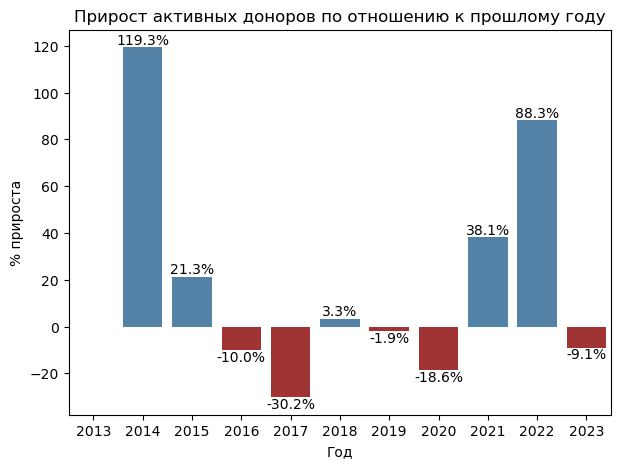

In [48]:
#построим график
plt.figure(figsize=(7,5))
colors = ['steelblue' if x > 0 else 'firebrick' for x in donor_growth.growth]
ax = sns.barplot(data = donor_growth, x='donation_year', y='growth', palette=colors)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Прирост активных доноров по отношению к прошлому году')
plt.xlabel('Год')
plt.ylabel('% прироста')
plt.show()

**Вывод:** В 2022г. количество активных доноров, регистрирующих свои донации на платформе, выросло почти в 2 раза к 2021г. Рост в 2021 и 2022г. возможно связан с связан со снятием короновирусных ограничений. Также рост вможет быть связан с запуском новой версии сайта в ноябре 2020. Однаков на ноябрь 2023г количество активных доноров упало на 9%. Необходимо помнить, что данные за 2023г неполные. Также снижение числа может быть объяснено кризисной ситуацией в стране.

In [49]:
#посмортим динамику изменения количества доноров по месяцам за последние 5 лет
growth_month = donations[donations['donation_year'] >= 2019].pivot_table(index='donation_month', columns='donation_year', values='user_id', aggfunc='nunique')
growth_month

donation_year,2019,2020,2021,2022,2023
donation_month,,,,,
1,1185.0,878.0,1048.0,1610.0,2312.0
2,1249.0,927.0,1171.0,1685.0,2442.0
3,1369.0,1012.0,1399.0,2364.0,2776.0
4,1519.0,1130.0,1414.0,2452.0,2398.0
5,1258.0,945.0,1188.0,1966.0,2091.0
6,1269.0,1086.0,1363.0,2265.0,2196.0
7,1263.0,1006.0,1171.0,2198.0,1909.0
8,1077.0,1023.0,1417.0,2311.0,1953.0
9,834.0,1055.0,1572.0,2410.0,1841.0


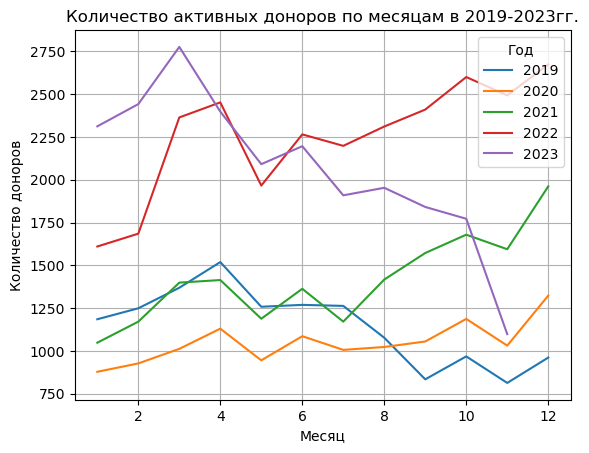

In [50]:
#построим график
sns.lineplot(data=growth_month, dashes=False)
plt.title('Количество активных доноров по месяцам в 2019-2023гг.')
plt.xlabel('Месяц')
plt.ylabel('Количество доноров')
plt.legend(title='Год')
plt.grid()
plt.show()

**Вывод:** Динамика по всем годам похожа, прослеживается некая сезонность - пики в количестве пользователей в марте-апреле, октябре и декабре. В 2022г. отмечается резкий рост в марте и октябре, возможно это связано с какими-то проведенными мероприятиями. Однако в 2023г. после спада в мае цифры продолжили идти вниз с резким спадом к ноябрю. Возможно это объясняется тем, что пользователи регистрируют свои донации в конце месяца, а данные за ноябрь 2023г. у нас неполные.

### 3.2 Прирост числа донаций

In [51]:
#посчитаем прирост количества донаций по отношению к предыдущему году в %
donation_growth = donations.pivot_table(index='donation_year', values='donation_id', aggfunc='count').reset_index().rename(columns={'donation_id': 'donation_total'})
donation_growth['growth'] = round((donation_growth.shift(-1)['donation_total'] - donation_growth['donation_total']) / donation_growth['donation_total'] * 100,2)  
donation_growth['growth'] = donation_growth['growth'].shift(1)
donation_growth

,donation_year,donation_total,growth
0,2013,8932,NaN
1,2014,15624,74.92
2,2015,19122,22.39
3,2016,18046,-5.63
4,2017,14384,-20.29
5,2018,15627,8.64
6,2019,15019,-3.89
7,2020,14410,-4.05
8,2021,18970,31.64
9,2022,29836,57.28


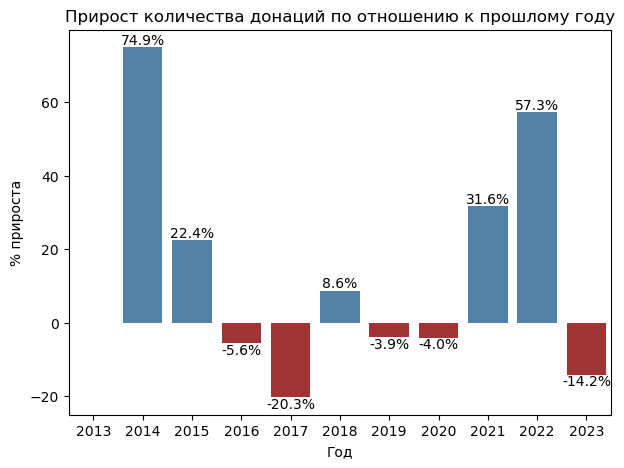

In [52]:
#построим график
plt.figure(figsize=(7,5))
colors = ['steelblue' if x > 0 else 'firebrick' for x in donation_growth.growth]
ax = sns.barplot(data = donation_growth, x='donation_year', y='growth', palette=colors)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Прирост количества донаций по отношению к прошлому году')
plt.xlabel('Год')
plt.ylabel('% прироста')
plt.show()

**Вывод:** Динамика прироста количества донаций повторяет динамику прироста активных доноров. В 2022г. рост составил 58%, тогда как на 23.11.2023г. цифры упали на 14%.

In [53]:
#посмотрим динамику изменения числа донаций по месяцам за последние 5 лет
change_month = donations[donations['donation_year'] >= 2019].pivot_table(index='donation_month', columns='donation_year', values='donation_id', aggfunc='count')
change_month

donation_year,2019,2020,2021,2022,2023
donation_month,,,,,
1,1284.0,1075.0,1158.0,1754.0,2543.0
2,1343.0,1001.0,1253.0,1851.0,2660.0
3,1443.0,1114.0,1549.0,2601.0,3159.0
4,1739.0,1486.0,1581.0,2662.0,2710.0
5,1331.0,1055.0,1279.0,2148.0,2376.0
6,1431.0,1175.0,1555.0,2502.0,2492.0
7,1422.0,1090.0,1461.0,2414.0,2168.0
8,1210.0,1195.0,1553.0,2565.0,2226.0
9,881.0,1168.0,1765.0,2674.0,2086.0


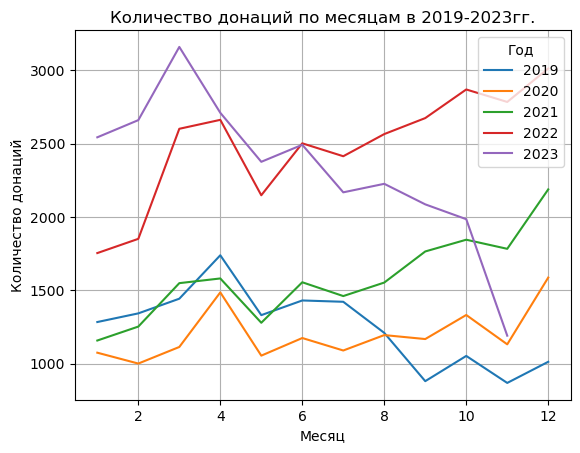

In [54]:
#построим график
sns.lineplot(data=change_month, dashes=False)
plt.title('Количество донаций по месяцам в 2019-2023гг.')
plt.xlabel('Месяц')
plt.ylabel('Количество донаций')
plt.legend(title='Год')
plt.grid()
plt.show()

**Вывод:** Динамика количества донаций похожа на динамику количества активных доноров. В 2022г. также наблюдается резкий рост числа донаций в марте и хороший рост в октябре и декабре. В 2023г. мы также видим рост в марте и спад после июня. 

### 3.3 Среднее количество донаций на 1 донора

Цельную кровь можно сдавать один раз в два месяца, не более 5 раз в год. Плазму или тромбоциты можно сдавать один раз в две недели, не более 6-12 раз в год. В связи с этой разницей рассчитаем среднее количество донаций на 1 донора для крови и для плазмы и тромбоцитов отдельно. Данных о эритроцитах и гранулоцитах (Лейкоциты) у нас очень мало.

In [55]:
#посчитаем среднее количество донаций крови на 1 донора
donations_blood = donations[donations['blood_type'] == 'Цельная кровь']
avg_blood = donations_blood.pivot_table(index='donation_year', values = ['user_id', 'donation_id'], aggfunc={'user_id' : 'nunique', 'donation_id': 'count'}).rename(columns={'donation_id': 'donation_total', 'user_id': 'user_total'}).reset_index()
avg_blood['avg'] = round(avg_blood['donation_total'] / avg_blood['user_total'], 2)
avg_blood

,donation_year,donation_total,user_total,avg
0,2013,5561,2782,2.00
1,2014,10603,6070,1.75
2,2015,12882,7334,1.76
3,2016,11995,6588,1.82
4,2017,9430,4688,2.01
5,2018,10443,4900,2.13
6,2019,10139,4805,2.11
7,2020,9389,3949,2.38
8,2021,12239,5437,2.25
9,2022,20109,10191,1.97


In [56]:
#посчитаем среднее количество донаций плазмы и тромбоцитов на 1 донора
donation_plasma_tr = donations[(donations['blood_type'] == 'Тромбоциты') | (donations['blood_type'] == 'Плазма')]
avg_plasma_tr = donation_plasma_tr.pivot_table(index='donation_year', values = ['user_id', 'donation_id'], aggfunc={'user_id' : 'nunique', 'donation_id': 'count'}).rename(columns={'donation_id': 'donation_total', 'user_id': 'user_total'}).reset_index()
avg_plasma_tr['avg'] = round(avg_plasma_tr['donation_total'] / avg_plasma_tr['user_total'], 2)
avg_plasma_tr

,donation_year,donation_total,user_total,avg
0,2013,3344,698,4.79
1,2014,4996,1510,3.31
2,2015,6175,1935,3.19
3,2016,5974,1768,3.38
4,2017,4903,1252,3.92
5,2018,5130,1321,3.88
6,2019,4839,1288,3.76
7,2020,4991,1120,4.46
8,2021,6717,1593,4.22
9,2022,9689,2492,3.89


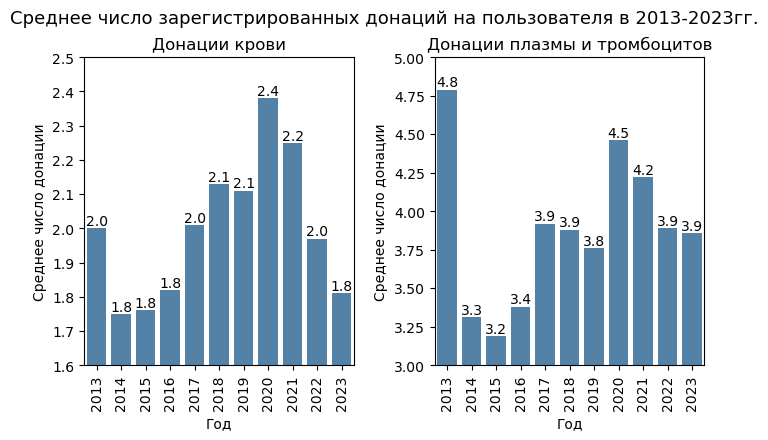

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle('Среднее число зарегистрированных донаций на пользователя в 2013-2023гг.', y=1, fontsize=13)

sns.barplot(data = avg_blood, x='donation_year', y='avg', ax=ax1, color='steelblue')
ax1.bar_label(ax1.containers[0], fmt='%.1f')
ax1.set_title('Донации крови')
ax1.set_xlabel('Год')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Среднее число донации')
ax1.set_ylim(1.6, 2.5)

sns.barplot(data = avg_plasma_tr, x='donation_year', y='avg', ax=ax2, color='steelblue')
ax2.bar_label(ax2.containers[0], fmt='%.1f')
ax2.set_title('Донации плазмы и тромбоцитов')
ax2.set_xlabel('Год')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Среднее число донации')
ax2.set_ylim(3, 5)

plt.subplots_adjust(wspace=0.3)

**Вывод:** Интересно, что в 2020г. наблюдось снижение количества доноров и донаций, однако среднее число донаций на донора самое высокое в 2020г. Возможно, что связано с пандемией и активным агитированием доноров к сдаче, которое привело к тому, что повторные доноры стали сдавать кровь чаще.  Среднее число донаций крови и плазмы/тромбоцитов в 2022 и 2023гг снизилось по сравнению с 2020 и 2021г., что может быть связано с окончанием пандемии и снижением темпов агитирования к донорству, а также общей кризисной ситуацией в стране. 

### 3.4 Среднее число планирования донаций на пользователя

In [58]:
#данные за 2020г неполные, поэтому расчитаем метрику только для 2021-2023гг
avg_plan = donation_plan[donation_plan['plan_year'] > 2020].pivot_table(index='plan_year', values=['user_id', 'donation_id'], aggfunc={'user_id': 'nunique', 'donation_id': 'count'}).reset_index().rename(columns={'donation_id': 'donation_total', 'user_id': 'users_total'})
avg_plan['avg'] = round(avg_plan['donation_total'] / avg_plan['users_total'],1)
avg_plan

,plan_year,donation_total,users_total,avg
0,2021,4009,2704,1.5
1,2022,10900,7148,1.5
2,2023,12026,7415,1.6


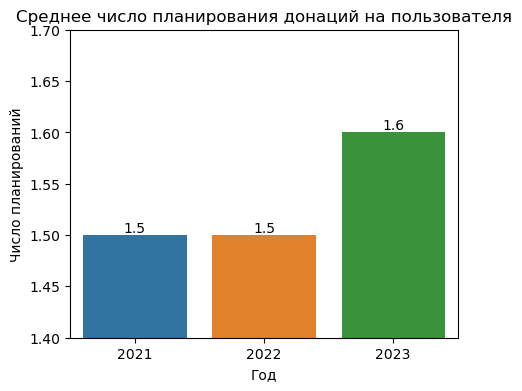

In [59]:
plt.figure(figsize=(5,4))
ax = sns.barplot(data = avg_plan, x='plan_year', y='avg')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Среднее число планирования донаций на пользователя')
plt.xlabel('Год')
plt.ylabel('Число планирований')
plt.ylim(1.4, 1.7)
plt.show()

**Вывод:** В 2022г. пользователи пользовались функцией планирования донаций также часто, как и в 2021г. В 2023г. цифра незначительно увеличилась -  +6%

### 3.5 Среднее число выставляемых оценок на пользователя

In [60]:
#посчитаем среднее число выставляемых оценок на пользователя
avg_note = note.pivot_table(index = 'year', values=['user_id', 'note'], aggfunc={'user_id': 'nunique', 'note': 'count'}).reset_index().rename(columns={'note': 'total_notes', 'user_id': 'total_users'})
avg_note['avg'] = round(avg_note['total_notes'] / avg_note['total_users'], 1)
avg_note['year'] = avg_note['year'].astype('int')
avg_note

,year,total_notes,total_users,avg
0,2013,134,51,2.6
1,2014,191,80,2.4
2,2015,208,82,2.5
3,2016,235,85,2.8
4,2017,340,136,2.5
5,2018,391,165,2.4
6,2019,569,244,2.3
7,2020,1071,586,1.8
8,2021,3031,1642,1.8
9,2022,5320,3339,1.6


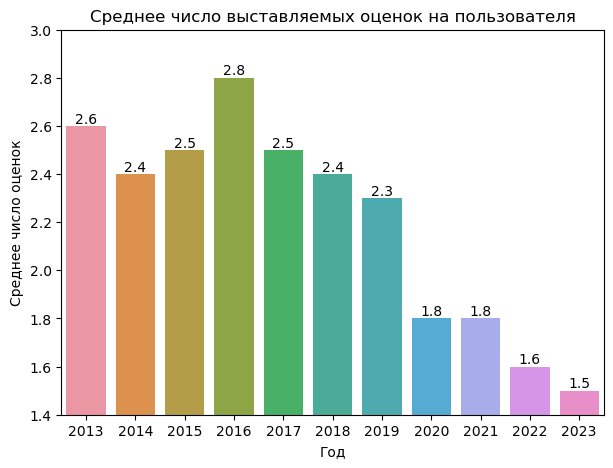

In [61]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data = avg_note, x='year', y='avg')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Среднее число выставляемых оценок на пользователя')
plt.xlabel('Год')
plt.ylabel('Среднее число оценок')
plt.ylim(1.4, 3)
plt.show()

**Вывод:** В 2022 и 2023гг. пользователи стали менее активными в оставлении оценки после донации. Возможно, пользователи сдают кровь всегда в одном и том же центре и со временем перестают оставлять оценки, так как качество услуг в центре не меняется. 

### 3.6 Скорость добавления донации на платформу 

In [62]:
#посчитаем количество дней между датой донации и датой ее добавления на платформу
donations['speed'] = donations['donation_added_date'] - donations['donation_date']
donations['speed'] = donations['speed'].dt.days

In [63]:
#добавим столбец
donations['added_year'] = pd.DatetimeIndex(donations['donation_added_date']).year

In [64]:
#изучим данные
donations['added_year'].value_counts()

2020    73143
2023    62634
2022    49591
2021    10198
Name: added_year, dtype: int64

Функция добавления донации на платформу судя по данным была добавлена только в 2020г. Учитывая то, что пользователи могут добавлять свои прошлые донации на платформу задним числом в дату регистрации, для расчетов ограничимся только теми донациями, которые были сделаны и добавлены в одинаковом году.

In [65]:
#найдем количество дней между донацией и ее добавлением на платформу
speed = donations[(donations['donation_year'] == donations['added_year']) & (donations['donation_year'] > 2020)].groupby('donation_year')['speed'].median().reset_index()
speed

,donation_year,speed
0,2021,1.0
1,2022,5.0
2,2023,1.0


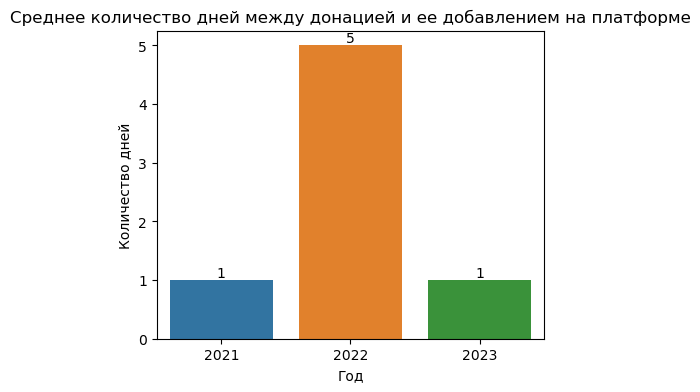

In [66]:
plt.figure(figsize=(5,4))
ax = sns.barplot(data = speed, x='donation_year', y='speed')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Среднее количество дней между донацией и ее добавлением на платформе')
plt.xlabel('Год')
plt.ylabel('Количество дней')
plt.show()

**Вывод:** В 2022г. пользователи в среднем добавляли донации на платформу через 5 дней после сдачи, а в 2023г. через 1 день.

### 3.7 Retention rate

In [67]:
#составим профили пользователей
profiles = (
        donations.sort_values(by=['user_id', 'donation_year'])
        .groupby('user_id')
        .agg({'donation_year': 'first'})
        .rename(columns={'donation_year': 'first_year'})
        .reset_index()  
    )
df = profiles.merge(donations, on='user_id', how='left')

#вычисляем лайфтайм
df['lifetime'] = df['donation_year'] - df['first_year']

#строим таблицу удержания
result = df.pivot_table(index='first_year', columns='lifetime', values='user_id', aggfunc='nunique')

#вычисляем размеры когорт
cohort_sizes = df.groupby('first_year').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})

#объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(result, on='first_year', how='left').fillna(0)

#делим данные таблицы удержания на размеры когорт
retention = result_grouped.div(result_grouped['cohort_size'], axis=0).drop(columns=['cohort_size'])
retention

,0,1,2,3,4,5,6,7,8,9,10
first_year,,,,,,,,,,,
2013,1.0,0.667195,0.502855,0.375635,0.292513,0.260787,0.224619,0.208439,0.216371,0.239530,0.193211
2014,1.0,0.352525,0.199127,0.119518,0.099979,0.083974,0.068801,0.076699,0.086676,0.066722,0.000000
2015,1.0,0.280956,0.148511,0.110893,0.086991,0.067594,0.072296,0.079937,0.063088,0.000000,0.000000
2016,1.0,0.230053,0.142210,0.110748,0.082809,0.085074,0.093884,0.074755,0.000000,0.000000,0.000000
2017,1.0,0.413137,0.288910,0.189910,0.178962,0.194193,0.152308,0.000000,0.000000,0.000000,0.000000
2018,1.0,0.460317,0.197946,0.191410,0.193277,0.154528,0.000000,0.000000,0.000000,0.000000,0.000000
2019,1.0,0.290764,0.228620,0.234892,0.180730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,1.0,0.464602,0.375369,0.272861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021,1.0,0.539663,0.303740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


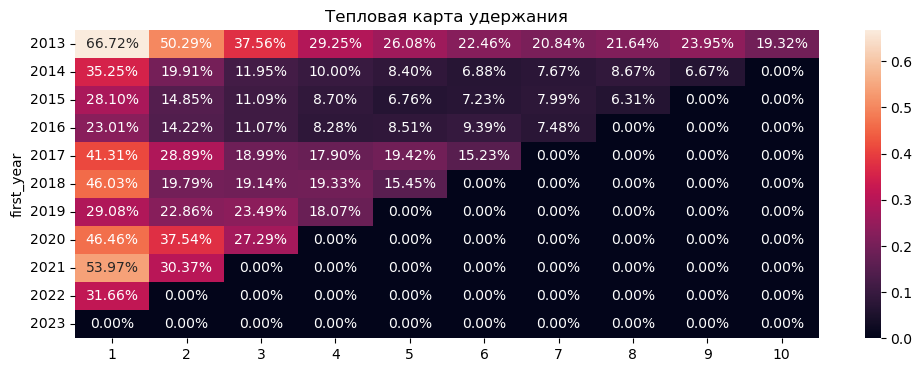

In [68]:
plt.figure(figsize=(12, 4))  # задаём размер графика
sns.heatmap(
    retention.drop(0, axis=1),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

**Вывод:** Самый высокий процент удержания пользователей в 2013г - 19% пользователей из 2013г. продолжают пользоваться платформой. Только 32% пользователей из 2022г. продолжают пользоваться платформой в 2023г., что ниже показателей 2020 и 2021г. по удержанию на 2ой год пользования продуктом. В целом видны проблемы с удержанием пользователей, в среднем 60% пользователей перестают пользоваться платформой на 2ой год после добавления первой донации.

### 3.8 Доли доноров, сдающих кровь 1 или более раз

Цельную кровь можно сдавать один раз в два месяца, не более 5 раз в год. Плазму или тромбоциты можно сдавать один раз в две недели, не более 6-12 раз в год. В связи с этой разницей рассчитаем среднее количество донаций на 1 донора для крови и для плазмы и тромбоцитов отдельно. Данных о эритроцитах и гранулоцитах (Лейкоциты) у нас очень мало.

In [69]:
#посчитаем количество донаций крови каждого донора с группировкой по годам
df1 = donations_blood.groupby(['donation_year', 'user_id'])['donation_id'].count().reset_index().rename(columns={'donation_id': 'don_nb'})
#отфильтруем макс 5 донаций (есть пользователи, регистрирующие все свои прошлые донации в день регистрации)
df1 = df1[df1['don_nb'] <=5]
#посчитаем количество доноров с 1-5 донациями
df2 = df1.pivot_table(index='donation_year', columns='don_nb', values='user_id', aggfunc='nunique')
#найдем общее количество донаций
df2['total'] = df2.sum(axis = 1)
df2 = df2.reset_index()
df2

don_nb,donation_year,1,2,3,4,5,total
0,2013,1584,579,278,198,90,2729
1,2014,3750,1196,588,362,132,6028
2,2015,4513,1375,774,448,166,7276
3,2016,3942,1209,739,451,193,6534
4,2017,2376,984,680,406,204,4650
5,2018,2143,1210,769,529,205,4856
6,2019,2180,1111,727,498,243,4759
7,2020,1542,849,687,565,254,3897
8,2021,2269,1116,929,752,314,5380
9,2022,5292,2045,1359,976,440,10112


In [70]:
#найдем доли
df3 = round(df2.iloc[:,1:6].div(df2.total, axis=0) * 100, 1)
df3 = df3.rename(columns={1 : '1_share', 2: '2_share', 3: '3_share', 4: '4_share', 5: '5_share'})
df3

don_nb,1_share,2_share,3_share,4_share,5_share
0,58.0,21.2,10.2,7.3,3.3
1,62.2,19.8,9.8,6.0,2.2
2,62.0,18.9,10.6,6.2,2.3
3,60.3,18.5,11.3,6.9,3.0
4,51.1,21.2,14.6,8.7,4.4
5,44.1,24.9,15.8,10.9,4.2
6,45.8,23.3,15.3,10.5,5.1
7,39.6,21.8,17.6,14.5,6.5
8,42.2,20.7,17.3,14.0,5.8
9,52.3,20.2,13.4,9.7,4.4


In [71]:
#объединим таблицы
df_final = pd.concat([df2, df3], axis=1)
df_final = df_final.set_index(df_final.columns[0])
df_final

don_nb,1,2,3,4,5,total,1_share,2_share,3_share,4_share,5_share
donation_year,,,,,,,,,,,
2013,1584,579,278,198,90,2729,58.0,21.2,10.2,7.3,3.3
2014,3750,1196,588,362,132,6028,62.2,19.8,9.8,6.0,2.2
2015,4513,1375,774,448,166,7276,62.0,18.9,10.6,6.2,2.3
2016,3942,1209,739,451,193,6534,60.3,18.5,11.3,6.9,3.0
2017,2376,984,680,406,204,4650,51.1,21.2,14.6,8.7,4.4
2018,2143,1210,769,529,205,4856,44.1,24.9,15.8,10.9,4.2
2019,2180,1111,727,498,243,4759,45.8,23.3,15.3,10.5,5.1
2020,1542,849,687,565,254,3897,39.6,21.8,17.6,14.5,6.5
2021,2269,1116,929,752,314,5380,42.2,20.7,17.3,14.0,5.8


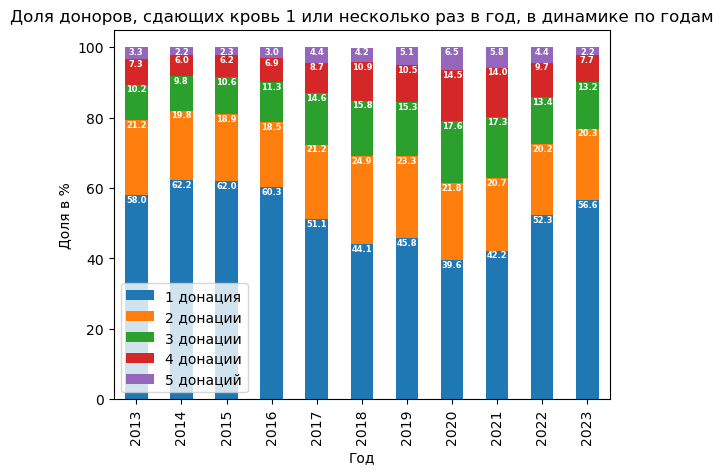

In [72]:
ax = df_final[['1_share', '2_share', '3_share', '4_share', '5_share']].plot(kind='bar', stacked=True)

y_offset = -2
for bar in ax.patches:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center',
      color='w',
      weight='bold',
      size=6
  )

plt.title('Доля доноров, сдающих кровь 1 или несколько раз в год, в динамике по годам')
plt.xlabel('Год')
plt.ylabel('Доля в %')
plt.legend(labels=['1 донация', '2 донации', '3 донации', '4 донации', '5 донаций'])
plt.show()

**Вывод:** В 2022 и 2023г. доля доноров, делающих только 1 донацию крови, увеличилась по отношению к прошлым годам. А доли доноров, делающих более 1 донации, уменьшились. 

In [73]:
#посчитаем количество донаций крови каждого донора с группировкой по годам
df4 = donation_plasma_tr.groupby(['donation_year', 'user_id'])['donation_id'].count().reset_index().rename(columns={'donation_id': 'don_nb'})
#отфильтруем макс 5 донаций (есть пользователи, регистрирующие все свои прошлые донации в день регистрации)
df4 = df4[df4['don_nb'] <= 8]
#посчитаем количество доноров с 1-5 донациями
df5 = df4.pivot_table(index='donation_year', columns='don_nb', values='user_id', aggfunc='nunique')
#найдем общее количество донаций
df5['total'] = df5.sum(axis = 1)
df5 = df5.reset_index()
df5

don_nb,donation_year,1,2,3,4,5,6,7,8,total
0,2013,320,83,52,41,40,26,28,8,598
1,2014,821,199,124,63,60,48,34,26,1375
2,2015,1038,288,129,106,71,75,38,36,1781
3,2016,871,274,159,104,78,51,33,25,1595
4,2017,484,221,128,87,58,48,49,43,1118
5,2018,508,223,121,101,76,60,47,45,1181
6,2019,466,232,123,99,88,66,52,38,1164
7,2020,334,195,123,101,68,60,44,37,962
8,2021,544,251,154,127,106,76,71,52,1381
9,2022,1009,370,240,158,119,118,90,67,2171


In [74]:
#найдем доли
df6 = round(df5.iloc[:,1:9].div(df5.total, axis=0) * 100, 1)
df6 = df6.rename(columns={1 : '1_share', 2: '2_share', 3: '3_share', 4: '4_share', 5: '5_share', 6: '6_share', 7: '7_share', 8: '8_share'})
df6

don_nb,1_share,2_share,3_share,4_share,5_share,6_share,7_share,8_share
0,53.5,13.9,8.7,6.9,6.7,4.3,4.7,1.3
1,59.7,14.5,9.0,4.6,4.4,3.5,2.5,1.9
2,58.3,16.2,7.2,6.0,4.0,4.2,2.1,2.0
3,54.6,17.2,10.0,6.5,4.9,3.2,2.1,1.6
4,43.3,19.8,11.4,7.8,5.2,4.3,4.4,3.8
5,43.0,18.9,10.2,8.6,6.4,5.1,4.0,3.8
6,40.0,19.9,10.6,8.5,7.6,5.7,4.5,3.3
7,34.7,20.3,12.8,10.5,7.1,6.2,4.6,3.8
8,39.4,18.2,11.2,9.2,7.7,5.5,5.1,3.8
9,46.5,17.0,11.1,7.3,5.5,5.4,4.1,3.1


In [75]:
#объединим таблицы
df_final_2 = pd.concat([df5, df6], axis=1)
df_final_2 = df_final_2.set_index(df_final_2.columns[0])
df_final_2

don_nb,1,2,3,4,5,6,7,8,total,1_share,2_share,3_share,4_share,5_share,6_share,7_share,8_share
donation_year,,,,,,,,,,,,,,,,,
2013,320,83,52,41,40,26,28,8,598,53.5,13.9,8.7,6.9,6.7,4.3,4.7,1.3
2014,821,199,124,63,60,48,34,26,1375,59.7,14.5,9.0,4.6,4.4,3.5,2.5,1.9
2015,1038,288,129,106,71,75,38,36,1781,58.3,16.2,7.2,6.0,4.0,4.2,2.1,2.0
2016,871,274,159,104,78,51,33,25,1595,54.6,17.2,10.0,6.5,4.9,3.2,2.1,1.6
2017,484,221,128,87,58,48,49,43,1118,43.3,19.8,11.4,7.8,5.2,4.3,4.4,3.8
2018,508,223,121,101,76,60,47,45,1181,43.0,18.9,10.2,8.6,6.4,5.1,4.0,3.8
2019,466,232,123,99,88,66,52,38,1164,40.0,19.9,10.6,8.5,7.6,5.7,4.5,3.3
2020,334,195,123,101,68,60,44,37,962,34.7,20.3,12.8,10.5,7.1,6.2,4.6,3.8
2021,544,251,154,127,106,76,71,52,1381,39.4,18.2,11.2,9.2,7.7,5.5,5.1,3.8


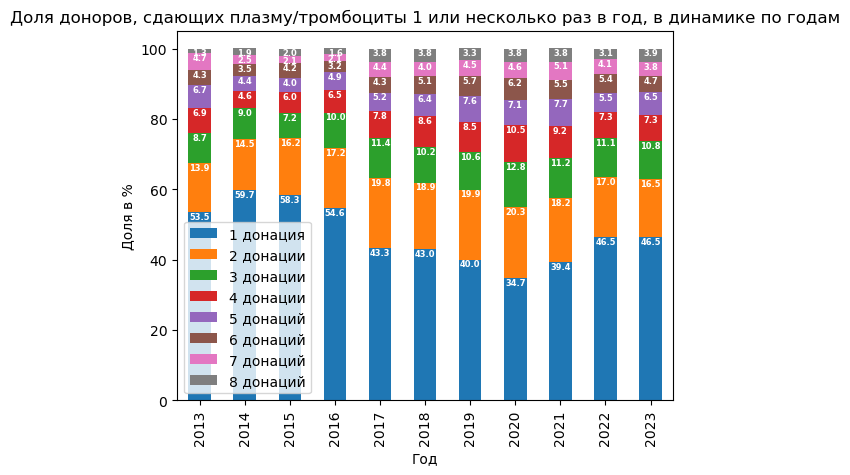

In [76]:
ax = df_final_2[['1_share', '2_share', '3_share', '4_share', '5_share', '6_share', '7_share', '8_share']].plot(kind='bar', stacked=True)

y_offset = -2
for bar in ax.patches:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center',
      color='w',
      weight='bold',
      size=6
  )

plt.title('Доля доноров, сдающих плазму/тромбоциты 1 или несколько раз в год, в динамике по годам')
plt.xlabel('Год')
plt.ylabel('Доля в %')
plt.legend(labels=['1 донация', '2 донации', '3 донации', '4 донации', '5 донаций', '6 донаций', '7 донаций', '8 донаций'])
plt.show()

**Вывод:** Похожая динамика прослеживается и с донациями плазмы и тромбоцитов. В 2022 и 2023г. доля доноров, делающих только 1 донацию крови, увеличилась по отношению к прошлым годам. А доли доноров, делающих более 1 донации, уменьшились.

### 3.9 Среднее количество дней между донациями

In [77]:
#сделаем расчеты для доноров крови
#отфильтруем доноров по id и дате донации
don_time = donations_blood[['user_id', 'donation_year', 'donation_date']].sort_values(by=['user_id', 'donation_date'])
#добавим столбец с прошлой датой донации для каждого юзера с сортировакой по году
don_time['previous'] = don_time.groupby(['donation_year', 'user_id'])['donation_date'].shift()
#посчитаем количество дней между донациями 
don_time['days_bw_donations'] = don_time['donation_date'] - don_time['previous']
don_time['days_bw_donations'] = don_time['days_bw_donations'].dt.days
#посчитаем среднее количество дней по годам
time_final = don_time.groupby('donation_year')['days_bw_donations'].mean().round().astype('int')
time_final

donation_year
2013    79
2014    89
2015    90
2016    89
2017    90
2018    92
2019    90
2020    88
2021    93
2022    90
2023    85
Name: days_bw_donations, dtype: int32

In [78]:
#сделаем расчеты для доноров плазмы и тромбоцитов
#отфильтруем доноров по id и дате донации
don_time_2 = donation_plasma_tr[['user_id', 'donation_year', 'donation_date']].sort_values(by=['user_id', 'donation_date'])
#добавим столбец с прошлой датой донации для каждого юзера с сортировакой по году
don_time_2['previous'] = don_time_2.groupby(['donation_year', 'user_id'])['donation_date'].shift()
#посчитаем количество дней между донациями 
don_time_2['days_bw_donations'] = don_time_2['donation_date'] - don_time_2['previous']
don_time_2['days_bw_donations'] = don_time_2['days_bw_donations'].dt.days
#посчитаем среднее количество дней по годам
time_final_2 = don_time_2.groupby('donation_year')['days_bw_donations'].mean().round().astype('int')
time_final_2

donation_year
2013    24
2014    32
2015    34
2016    35
2017    37
2018    38
2019    39
2020    38
2021    37
2022    37
2023    33
Name: days_bw_donations, dtype: int32

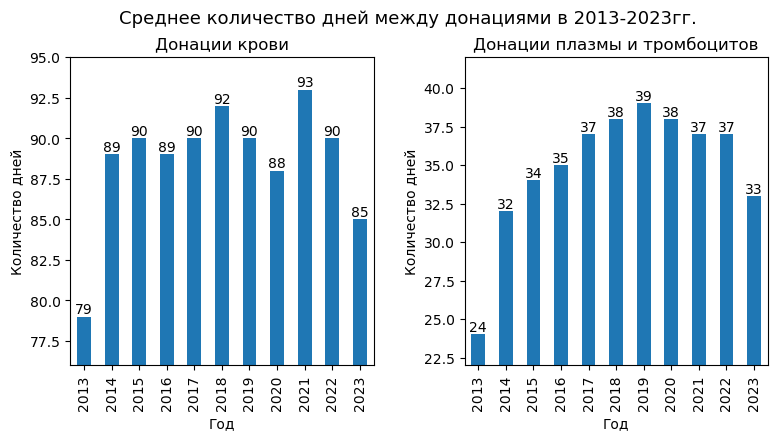

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Среднее количество дней между донациями в 2013-2023гг.', y=1, fontsize=13)

time_final.plot(kind='bar', ax=ax1)
ax1.bar_label(ax1.containers[0], fmt='%.f')
ax1.set_title('Донации крови')
ax1.set_xlabel('Год')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Количество дней')
ax1.set_ylim(76, 95)

time_final_2.plot(kind='bar', ax=ax2)
ax2.bar_label(ax2.containers[0], fmt='%.f')
ax2.set_title('Донации плазмы и тромбоцитов')
ax2.set_xlabel('Год')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Количество дней')
ax2.set_ylim(22, 42)

plt.subplots_adjust(wspace=0.3)
plt.show()

**Вывод:** Интервал между донациями крови должен составлять не менее 60 дней, а между донациями плазмы и тромбоцитов не менее 14 дней. Среднее количество донаций на пользователя в 2022 и 2023г ниже значений предыдущего года, но при этом количество дней между донациями тоже меньше значений 2021г. 

### 3.10 Выводы

 - В 2022г количество активных доноров, регистрирующих свои донации на платформе, выросло почти в 2 раза по отношению к 2021г. Рост возможно связан с связан со снятием короновирусных ограничений. Однако на ноябрь 2023 количество активных доноров упало на 9%. Снижение числа может быть объяснено кризисной ситуацией в стране.
 - Динамика прироста количества донаций повторяет динамику прироста активных доноров. В 2022г. рост составил 58%, тогда как на ноябрь 2023г. цифры упали на 14%.
 - Динамика прироста доноров и донаций по месяцам примерно совпадает по всем годам. Прослеживается некая сезонность - пики в количестве пользователей и донаций в марте-апреле, октябре и декабре. 
 - Среднее число донаций крови и плазмы/тромбоцитов в 2022 и 2023гг снизилось по сравнению с 2020 и 2021г., что может быть связано с окончанием пандемии и снижением темпов агитирования к донорству, а также общей кризисной ситуацией в стране.
 - В 2022г. пользователи пользовались функцией планирования донаций также часто, как и в 2021г. В 2023г. цифра незначительно увеличилась - +6%.
 - В 2022 и 2023гг. пользователи стали менее активными в оставлении оценки после донации. Возможно, пользователи сдают кровь всегда в одном и том же центре и со временем перестают оставлять оценки, так как качество услуг в центре не меняется.
 - В 2022г. пользователи в среднем добавляли донации на платформу через 5 дней после сдачи, а в 2023г. через 1 день.
 - Самый высокий процент удержания пользователей в 2013г - 19% пользователей из 2013г. продолжают пользоваться платформой. Только 32% пользователей из 2022г. продолжают пользоваться платформой в 2023г., что ниже показателей 2020 и 2021г. по удержанию на 2ой год пользования продуктом. В целом видны проблемы с удержанием пользователей, в среднем 60% пользователей перестают пользоваться платформой на 2ой год после добавления первой донации.
 - В 2022 и 2023г. доля доноров, делающих только 1 донацию крови и плазмы/тромбоцитов, увеличилась по отношению к прошлым годам. А доли доноров, делающих более 1 донации, уменьшились.
 - Среднее количество дней между донациями в 2022 и 2023г уменшилось по отношению к 2021г.

# 4 Анализ пользователей

### 4.1 Кодировка

In [80]:
#удалим столбцы, в которых дублируется информация
users = users.drop(['Подтверждённые_донации', 'Донаций_на_момент_регистрации'], axis = 1)

В целях анализа будем считать активными доноров, у которых была как минимум 1 донация в 2022 и 2023г. 

In [81]:
#найдем активных доноров, у которых была хотя бы одна донация в 2022 и 2023
active_2022 = donations[donations['donation_year'] == 2022]
active_2023 = donations[donations['donation_year'] == 2023]
active_id = active_2022.merge(active_2023, on='user_id')['user_id'].unique()
active_id

array([275072, 197968, 233064, ..., 157748, 183177, 152370], dtype=int64)

In [82]:
#создадим столбец, где обозначим активных доноров
def active(id):
    if id in active_id:
        return 1
    return 0
users['Активный'] = users['user_id'].apply(active)

In [83]:
#посмотрим сколько активных и неактивных доноров в базе данных
print('Активные доноры:', users[users['Активный'] == 1]['user_id'].count())
print('Неактивные доноры:', users[users['Активный'] == 0]['user_id'].count())

Активные доноры: 5182
Неактивные доноры: 260292


In [84]:
#создадим столбец Пол_1, где заменим значения Ж на 1, а М на 0
users['Пол_1'] = np.where(users['Пол'].str.contains('Женский'), 1, 0)

In [85]:
#создадим столбец с возрастом
today = date.today() 
users['Возраст'] = users['Дата_рождения'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [86]:
#переведем значения группы крови в бинарный формат
users['Группа_крови_2'] = users['Группа_крови']
users = pd.get_dummies(users, columns=['Группа_крови_2'])
users.columns = users.columns.str.removeprefix('Группа_крови_2_')

In [87]:
#создадим столбец Kell-фактор_1, где заменим значения Положительный на 1, а Отрицательный на 0
users['Kell-фактор_1'] = np.where(users['Kell-фактор'].str.contains('Положительный'), 1, 0)

In [88]:
#заменим Да на 1 и Нет на 0 во всех колонках
users = users.replace('Да', 1)
users = users.replace('да', 1)
users = users.replace('Нет', 0)
users = users.replace('нет', 0)

In [89]:
#заменим "Дата получения не известна" в столбце Почетный_донор на nan
users['Почетный_донор'] = users['Почетный_донор'].replace('Дата получения не известна', np.nan)

In [90]:
#найдем количество дней до получения статус Почетный донор
curr_time = pd.to_datetime('now')
users['Дней_до_почетного_донора'] = users['Предполагаемая_дата_получения_почетного_донора'] - curr_time
users['Дней_до_почетного_донора'] = users['Дней_до_почетного_донора'].dt.days

C:\Users\Yulia\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [91]:
#найдем количество дней, которое пользователи провели на платформе, после регистрации 
users['Дней_после_регистрации'] = curr_time - users['Дата_регистрации']
users['Дней_после_регистрации'] = users['Дней_после_регистрации'].dt.days 

In [92]:
#найдем количество дней после последней активности
users['Дней_после_послед_активности'] = curr_time - users['Последняя_активность']
users['Дней_после_послед_активности'] = users['Дней_после_послед_активности'].dt.days

### 4.2 Матрица корреляции

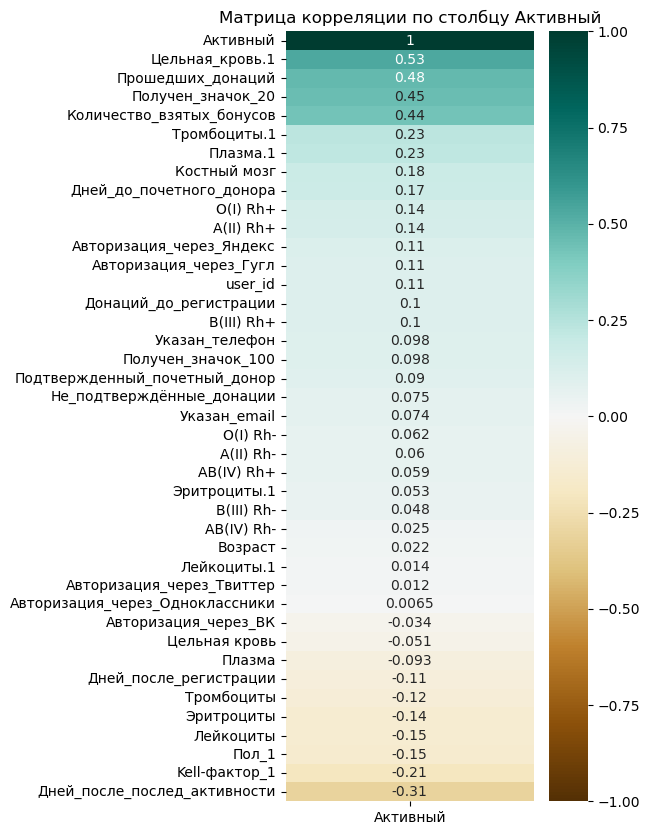

In [104]:
#построим матрицу корреляции по столбцу Активный
plt.figure(figsize=(4, 10))
heatmap = sns.heatmap(users.corr()[['Активный']].sort_values(by='Активный', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Матрица корреляции по столбцу Активный')
plt.show()

**Вывод:** Выраженной корреляции между признаками доноров и их активностью не обнаружено. Умеренная корреляция по шкале Чеддока наблюдается между активность донора и такими признаками как количество донаций цельной крови, количеством прошедших донаций, получение значка 20, количество взятых бонусов, количество дней до почетного донора и количество дней после последней донации. 

### 4.3 Составление портрета

### 1. Пол

In [105]:
#посмотрим на распределение активных доноров по гендерному признаку
gender_active = users.groupby('Пол')['Активный'].mean().sort_values(ascending=False).round(2).reset_index()
gender_active

,Пол,Активный
0,Мужской,0.06
1,Женский,0.04


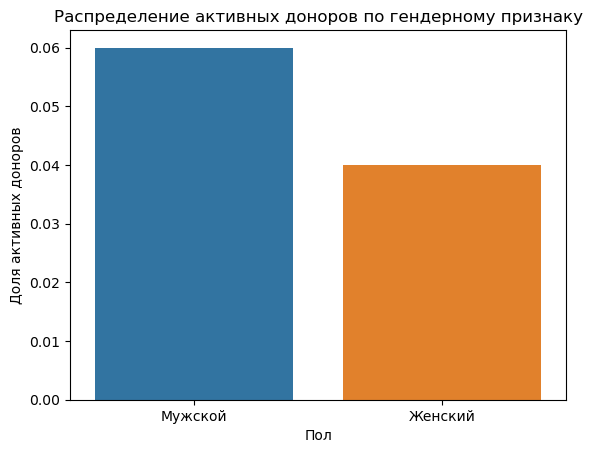

In [106]:
#построим график
sns.barplot(data=gender_active, x='Пол', y='Активный')
plt.title('Распределение активных доноров по гендерному признаку')
plt.xlabel('Пол')
plt.ylabel('Доля активных доноров')
plt.show()

**Вывод:** Мужчины являются более активными донорами. Это возможно объясняется тем, что женщины в силу своей физиологии могут сдавать кровь меньшее количество раз в год, чем мужчины.

### 2. Возраст

In [ ]:
#посмотрим на распределение доноров по признаку возраст
sns.histplot(data = users, hue='Активный', x='Возраст', stat='density', common_norm=False)
plt.title('Распределение доноров по признаку Возраст')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

**Вывод:** На графике видно, что доноры в возрасте 30-45 лет более активны, а доноры в возрасте 20-30 лет менее активны.

### 3. Регион

In [ ]:
#создадим столбец Регион_1 с названиями регионов из столбца Регион
users_new = users[users['Регион'].notnull()]
users_new['Регион_1'] = users_new['Регион'].map(lambda x: x.split(', ')[1])

In [ ]:
# посмотрим на распределение числа доноров по регионам
users_new.groupby('Регион_1')['user_id'].nunique().describe()

В 50% регионов датасета 1 или 2 донора. В целях анализа оставим только регионы, где в датасете в сумме есть больше 75 доноров. 

In [ ]:
#найдем список регионов, где есть больше 75 доноров
r = users_new.groupby('Регион_1')['user_id'].nunique().reset_index()
r = r[r['user_id'] > 75]
r1 = r['Регион_1'].values

In [ ]:
#создадим столбец, где обозначим регионы с 75 донорами единицей
def big_region(region):
    if region in r1:
        return 1
    return 0
users_new['75_доноров'] = users_new['Регион_1'].apply(big_region)

In [ ]:
#найдем топ 10 регионов по активности доноров
top_region = users_new[users_new['75_доноров'] == 1].groupby('Регион_1')['Активный'].mean().sort_values(ascending=False).round(3).reset_index().head(10)
top_region

In [ ]:
#построим график
sns.barplot(data=top_region, x='Активный', y='Регион_1')
plt.title('Топ 10 регионов по активным донорам')
plt.xlabel('Доля активных доноров')
plt.ylabel('Регион')
plt.show()

In [ ]:
#найдем регионы с максимальным количеством доноров
users_new.groupby('Регион_1')['user_id'].count().sort_values(ascending=False).head(5)

In [ ]:
#посмотрим на распределение активных доноров
users_new[(users_new['Регион_1'] == 'Москва') | (users_new['Регион_1'] == 'Санкт-Петербург') | (users_new['Регион_1'] == 'Татарстан') | (users_new['Регион_1'] == 'Московская область') | (users_new['Регион_1'] == 'Башкортостан')].groupby('Регион_1')['Активный'].mean().sort_values(ascending=False).round(3)

**Вывод:** В топе регионов по активным донорам находятся Камчатский край, Ханты-Мансийский автономный округ и Смоленская область. В Москве и Санкт-Петербурге находится наибольшее количество доноров, однако доля активных доноров мала. 

### 4. Группа крови

In [ ]:
#посмотрим на распределение активных доноров по группам крови
blood_type = users.groupby('Группа_крови')['Активный'].mean().sort_values(ascending=False).round(2).reset_index()
blood_type

In [ ]:
#построим график
sns.barplot(data=blood_type, x='Активный', y='Группа_крови')
plt.title('Распределение активных доноров по группам крови')
plt.xlabel('Доля активных доноров')
plt.ylabel('Группа крови')
plt.xlim(0.04, 0.12)
plt.show()

**Вывод:** Самые активные доноры имеют 1, 2 и 3 группу крови и положительный резус фактор. Наименьшая активность у доноров с четвертой группой и отрицательным резус фактором. Однако, это скорее всего объясняется распределением групп крови у населения - ~40% имеют 1 группу и всего ~6% имеют 4 группу. 

### 5. Почетный донор и значки 20/100

In [ ]:
#посмотрим на распределение доноров по признаку наличия статуса почетного донора
honorary = users.groupby('Подтвержденный_почетный_донор')['Активный'].mean().sort_values(ascending=False).round(2).reset_index()
honorary

In [ ]:
#построим график
sns.barplot(data=honorary, x='Подтвержденный_почетный_донор', y='Активный')
plt.title('Распределение активных доноров по признаку наличия статуса почетного донора')
plt.xlabel('Статус донора')
plt.ylabel('Доля активных доноров')
plt.legend(labels=['0: Донор', '1: Почетный донор'])
plt.show()

In [ ]:
#посмотрим на распределение доноров по признаку наличия занчка 20
users.groupby('Получен_значок_20')['Активный'].mean().reset_index()

In [ ]:
#посмотрим на распределение доноров по признаку наличия значка 100
users.groupby('Получен_значок_100')['Активный'].mean().reset_index()

**Вывод:** Активные доноры чаще всего имеют статус Почетного донора, а также значки 20 и 100.

### 6. Донации крови и ее компонентов

In [ ]:
#посмотрим среднее количество донаций активных и неактивных доноров по компонентам
users.groupby('Активный')[['Цельная_кровь.1', 'Плазма.1', 'Тромбоциты.1', 'Эритроциты.1', 'Лейкоциты.1']].agg(['sum', 'mean']).round(2)

In [ ]:
#посмотрим среднее количество донаций активных и неактивных доноров
users.groupby('Активный')['Прошедших_донаций'].agg(['sum', 'mean']).round(2)

In [ ]:
#посмотрим среднее количество донаций, сделанных до регистрации, активных и неактивных доноров
users.groupby('Активный')['Донаций_до_регистрации'].agg(['sum', 'mean']).round(2)

**Вывод:** Как и ожидалось, расчеты показывают, что среднее количество донаций активных доноров выше количества донаций неактивных доноров - 18,8 к 0,48. Акивные доноры также имеют более высокое число подтвержденных донаций, которые они сделали до регистрации - 17,5 к 12,2 у неактивных доноров. В разрезе крови и ее компонентов, активные доноры чаще всего сдают Цельную кровь - 11 донаций, Плазму - 5 донаций и Тромбоциты - 2,5 донации. 

### 7. Количество дней после регистрации и последней активности

In [ ]:
#посмотрим на распределение доноров по признаку количества дней, прошедших после регистрации
sns.histplot(data = users, hue='Активный', x='Дней_после_регистрации', stat='density', common_norm=False)
plt.title('Распределение доноров по признаку Количество дней, прошедших после регистрации')
plt.xlabel('Количество дней')
plt.ylabel('Плотность')
plt.show()

In [ ]:
#посмотрим на распределение доноров по признаку количества дней, прошедших после последней активности
sns.histplot(data = users, hue='Активный', x='Дней_после_послед_активности', stat='density', common_norm=False)
plt.title('Распределение доноров по признаку Количество дней, прошедших после последней активности')
plt.xlabel('Количество дней')
plt.ylabel('Плотность')
plt.show()

**Вывод:** На первом графике видно, что активные доноры зарегистрировались на платформе не больше 1,5 лет назад, то есть до июня 2022г. Также немного более активны доноры, которые зарегестрировались на платформе 2,5 - 3 года назад, т.е. между июнем 2021 и ноябрем 2020. Это возможно говорит о проблеме удеражния пользователей на платформе. Активные доноры совершают последнюю активность на платформе не более 200 дней назад. 

### 8. Контакты и соц. сети

In [ ]:
#посмотрим на распределение активных доноров в разрезе контактов и соц. сетей
users.groupby('Активный')[['Указан_email', 'Указан_телефон', 'Авторизация_через_ВК', 'Авторизация_через_Одноклассники', 'Авторизация_через_Твиттер', 'Авторизация_через_Яндекс', 'Авторизация_через_Гугл']].mean().round(2)

**Вывод:** Активные доноры чаще указывают в анкете имейл и телефон, а также чаще привязывают аккаунты Гугл и Яндекс, чем неактивные доноры. При этом неактивные доноры чаще привязывают аккаунт ВК. 

### 9. Бонусы

In [ ]:
#посмотрим на распределение доноров по признаку количества взятых бонусов
sns.histplot(data = users[users['Количество_взятых_бонусов'] < 40], hue='Активный', x='Количество_взятых_бонусов', stat='density', common_norm=False)
plt.title('Распределение доноров по признаку количества взятых бонусов')
plt.xlabel('Количество бонусов')
plt.ylabel('Плотность')
plt.show()

**Вывод:** Активные доноры берут в основном от 2 до 10 бонусов, тогда как неактивные берут меньше 2х. 

### 10. Тип донации

In [109]:
#посмотрим на распределение по типу донации у активных доноров
type = donations[donations['user_id'].isin(active_id)]['donation_type'].value_counts()
type

Безвозмездно    82859
Платно           5473
Name: donation_type, dtype: int64

In [115]:
#посмотрим на распределение по типу донации у неактивных доноров
type_passive = donations[donations['user_id'].isin(active_id) == False]['donation_type'].value_counts()
type_passive

Безвозмездно    99360
Платно           7874
Name: donation_type, dtype: int64

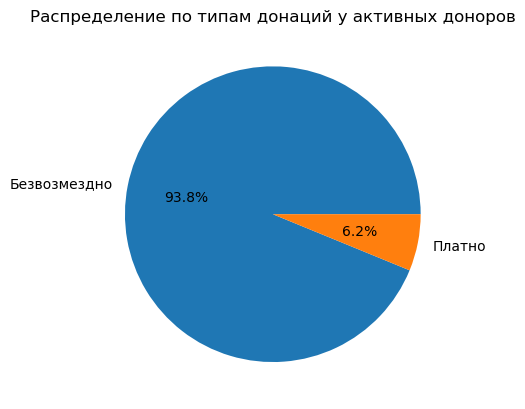

In [116]:
#построим график
type.plot.pie(autopct='%1.1f%%', title='Распределение по типам донаций у активных доноров').set(ylabel=(' '))
plt.show()                                                                             

**Вывод:** 93.8% донаций активных доноров сделаны на безвозмездной основе и только 6.2% донаций за денежное вознаграждение. У неактивных доноров процент безвозмездных донаций немного ниже - 92,6%.

### 11. Портрет активного донора и рекомендации по реактивации неактивных доноров.

**Портрет активного донора:**
 - Мужчина 
 - Возраст 30-45 лет
 - Регионы : Камчатский край, Ханты-Мансийский Автономный округ, Смоленская область, Брянская область, Амурская область, 
   Орловская область, Ивановская область, Саратовская область, Новгородская область, Тамбовская область
 - I, II и III группа крови и положительный резус фактор
 - Наличие статуса Почетного донора, а также значков 20 и 100
 - Чаще всего сдают Цельную кровь, Плазму и Тромбоциты
 - Регистрация на платформе июнь 2022 - ноябрь 2023
 - Последняя активность на платформе май 2023 - ноябрь 2023
 - Указывает в анкете имейл и телефон и привязывает аккаунты Гугл, Яндекс. 
 - Берет 2-10 бонусов.
 - Донации на безвозмездной основе.

**Рекомендации по реактивации неактивных доноров:**
- Более активное взаимодействие с донорами в возрасте 20-30 лет - email рассылка; подключение компаний-партнеров и бонусов, потенциально интересных этой возрастной группе; организация мероприятий для молодежи.
- Усилить коммуникацию в регионах с низким уровнем активности доноров, особенно в Москве и Санкт-Петербурге, которые являются лидирами по количеству доноров. 
- Разработать стратегию по удержанию пользователей, так как доноры в большинстве становятся неактивными через 1,5 - 2 года после регистрации.
- Неактивные доноры мало пользуются бонусами, возможно необходимо пересмотреть эту программу или подключать новых партнеров с интересными предложениями.
- Неактивные доноры не всегда указывают имейл и телефон, поэтому желательно проводить коммуникацию по разным каналам связи, в том числе соц. сети ВК, которая пользуется наибольшей популярностью среди неактивных доноров. 

### 4.4 Выводы

- В целях анализа будем считать активными доноров, у которых была как минимум 1 донация в 2022 и 2023г. Таких доноров 5182 из общего количества доноров 260292.
- Выраженной корреляции между признаками доноров и их активностью не обнаружено. Умеренная корреляция по шкале Чеддока наблюдается между активность донора и такими признаками как количество донаций цельной крови, количеством прошедших донаций, получение значка 20, количество взятых бонусов, количество дней до почетного донора и количество дней после последней донации.
- Мужчины являются более активными донорами. Это возможно объясняется физиологией женщин.
- Доноры в возрасте 30-45 лет наиболее активны, а доноры в возрасте 20-30 лет наименее активны.
- В топе регионов по активным донорам находятся Камчатский край, Ханты-Мансийский автономный округ и Смоленская область. В Москве и Санкт-Петербурге находится наибольшее количество доноров, однако доля активных доноров мала.
- Активные доноры имеют 1, 2 и 3 группу крови и положительный резус фактор. Наименьшая активность у доноров с четвертой группой и отрицательным резус фактором. Однако, это скорее всего объясняется распределением групп крови у населения.
- Активные доноры чаще всего имеют статус Почетного донора, а также значки 20 и 100.
- Активные доноры чаще всего сдают Цельную кровь - в среднем 11 донаций, Плазму - 5 донаций и Тромбоциты - 2,5 донации.
- Активные доноры зарегистрировались на платформе в период июнь 2022 - ноябрь 2023. Активные доноры совершают последнюю активность на платформе в течении последних 6 месяцев.
- Активные доноры чаще указывают в анкете имейл и телефон, а также чаще привязывают аккаунты Гугл и Яндекс, чем неактивные доноры. При этом неактивные доноры чаще привязывают аккаунт ВК.
- Активные доноры берут в основном от 2 до 10 бонусов, тогда как неактивные берут меньше 2х.
- 93.8% донаций активных доноров сделаны на безвозмездной основе и только 6.2% донаций за денежное вознаграждение. У неактивных доноров процент безвозмездных донаций немного ниже - 92,6%.